In [30]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
from scipy.special import erf

In [151]:
def fham(r,a,q,y0):
    return -a/r**q-y0

def fover(r,a,b,y0):
    return b*erf(a*r)/r-y0

In [32]:
os.chdir('/home/franco/dftb_devel/src/prg_dftb/h2')

In [33]:
data1 = np.genfromtxt('hamil_dhh.dat')
data2 = np.genfromtxt('over_dhh.dat')

In [34]:
d = data1[:,0]
h = data1[:,1]
s = data2[:,1]

In [159]:
popt1, pcov1 = curve_fit(fham, d, h, p0=[1,3,0], maxfev=4000)

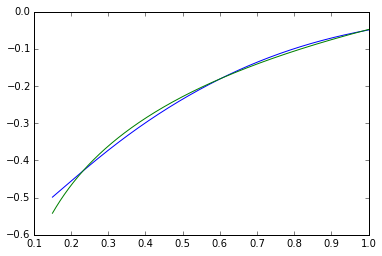

In [160]:
hfit = fham(d,*popt1)
plt.plot(d,h,d,hfit)

In [162]:
popt1

array([  5.02049612e+03,   5.18662629e-05,  -5.02044812e+03])

El hamiltoniano se fita con los siguientes parámetros $$H=-\frac{a}{r^q}+y_0$$ con $a=5.0205\times10^3$, $q=5.18663\times 10^{-5}$, $y_0=5.02045\times 10^{3}$

In [161]:
popt2, pcov2 =  curve_fit(fover, d, s, p0=[3,0.5,0.6])

array([ 2.76028932,  0.44674628,  0.38930338])

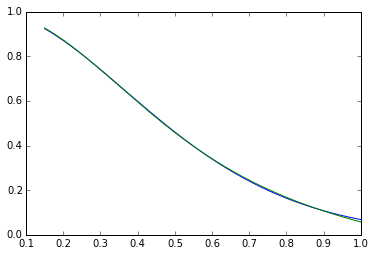

In [164]:
sfit = fover(d,*popt2)
plt.plot(d,s,d,sfit)
popt2

El overlap se fita con los siguientes parámetros $$S=b\frac{\mathrm{erfc}(ar)}{r}-y_0$$ con $a=2.7603$, $q=0.44675$, $y_0=0.3893$